# Check all the results

In [12]:
import os

def find_vcf_files(sample_dir):
    alu_vcf_exists = any(file.endswith('.vcf') for file in os.listdir(os.path.join(sample_dir, 'Alu')))
    l1_vcf_exists = any(file.endswith('.vcf') for file in os.listdir(os.path.join(sample_dir, 'L1')))
    return alu_vcf_exists and l1_vcf_exists


def printResultStatus(TARGET_DIR):
    if os.path.exists(TARGET_DIR) and os.path.isdir(TARGET_DIR):
        subdirs = [subdir for subdir in os.listdir(TARGET_DIR) if os.path.isdir(os.path.join(TARGET_DIR, subdir))]
    
        print(f"Subdirectories of {TARGET_DIR}:")
        
        for subdir in subdirs:
            subdir_path = os.path.join(TARGET_DIR, subdir)
            print(subdir_path)
    
            sampledirs = [sampledir for sampledir in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, sampledir))]
            print(f"Sample directories of {subdir_path}:")
    
            for sampledir in sampledirs:
                sampledir_path = os.path.join(subdir_path, sampledir)
                print(sampledir_path)
    
                if find_vcf_files(sampledir_path):
                    print(f"VCF files found for {sampledir_path} in Alu and L1 subdirectories.")
                else:
                    print(f"No VCF files found for {sampledir_path} in Alu or L1 subdirectories.")
    
            print(" ")
    else:
        print("Error: Target directory does not exist.")

### germline results

In [13]:
TARGET_DIR = "results/xTea/shortread/germline/mixedDataRetroSom"
printResultStatus(TARGET_DIR)

Subdirectories of results/xTea/shortread/germline/mixedDataRetroSom:
results/xTea/shortread/germline/mixedDataRetroSom/Simul400x
Sample directories of results/xTea/shortread/germline/mixedDataRetroSom/Simul400x:
results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_11
VCF files found for results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_11 in Alu and L1 subdirectories.
results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_14
VCF files found for results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_14 in Alu and L1 subdirectories.
results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_10
VCF files found for results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_10 in Alu and L1 subdirectories.
results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_12
VCF files found for results/xTea/shortread/germline/mixedDataRetroSom/Simul400x/TITR_12 in Alu and L1 subdirectories.
results/xTea/shortread/germline/mixedDataRet

In [14]:
TARGET_DIR = "results/xTea/shortread/germline/GIAB"
printResultStatus(TARGET_DIR)

Subdirectories of results/xTea/shortread/germline/GIAB:
results/xTea/shortread/germline/GIAB/Illumina300x
Sample directories of results/xTea/shortread/germline/GIAB/Illumina300x:
results/xTea/shortread/germline/GIAB/Illumina300x/HG002
VCF files found for results/xTea/shortread/germline/GIAB/Illumina300x/HG002 in Alu and L1 subdirectories.
results/xTea/shortread/germline/GIAB/Illumina300x/HG003
VCF files found for results/xTea/shortread/germline/GIAB/Illumina300x/HG003 in Alu and L1 subdirectories.
 


# somatic (mosaic) results

In [15]:
TARGET_DIR = "results/xTea/shortread/mosaic/mixedDataRetroSom"
printResultStatus(TARGET_DIR)

Subdirectories of results/xTea/shortread/mosaic/mixedDataRetroSom:
results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x
Sample directories of results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x:
results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_11
VCF files found for results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_11 in Alu and L1 subdirectories.
results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_14
VCF files found for results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_14 in Alu and L1 subdirectories.
results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_10
VCF files found for results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_10 in Alu and L1 subdirectories.
results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_12
VCF files found for results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_12 in Alu and L1 subdirectories.
results/xTea/shortread/mosaic/mixedDataRetroSom/Simul400x/TITR_9
V

In [16]:
TARGET_DIR = "results/xTea/shortread/mosaic/GIAB"
printResultStatus(TARGET_DIR)

Subdirectories of results/xTea/shortread/mosaic/GIAB:
results/xTea/shortread/mosaic/GIAB/Illumina300x
Sample directories of results/xTea/shortread/mosaic/GIAB/Illumina300x:
results/xTea/shortread/mosaic/GIAB/Illumina300x/HG002
VCF files found for results/xTea/shortread/mosaic/GIAB/Illumina300x/HG002 in Alu and L1 subdirectories.
results/xTea/shortread/mosaic/GIAB/Illumina300x/HG003
VCF files found for results/xTea/shortread/mosaic/GIAB/Illumina300x/HG003 in Alu and L1 subdirectories.
 


In [17]:
!which python

/home/jp394/miniforge3/envs/SMaTH/bin/python


# Read VCF Files

In [19]:
import vcf
def read_vcf_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".vcf"):
                vcf_path = os.path.join(root, file)
                print(f"Reading VCF file: {vcf_path}")
                parse_vcf(vcf_path)

def parse_vcf(vcf_path):
    try:
        vcf_reader = vcf.Reader(open(vcf_path, 'r'))
        for record in vcf_reader:
            # Process each VCF record as needed
            print(record)
    except Exception as e:
        print(f"Error reading VCF file {vcf_path}: {e}")

In [29]:
import vcf
import pandas as pd

def read_vcf_files(directory):
    data = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".vcf"):
                vcf_path = os.path.join(root, file)
                sample_group = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(vcf_path))))
                sample_id = os.path.basename(os.path.dirname(os.path.dirname(vcf_path)))
                te_type = os.path.basename(os.path.dirname(vcf_path))
                data.extend(parse_vcf(vcf_path, sample_group, sample_id, te_type))

    return pd.DataFrame(data)

def parse_vcf(vcf_path, sample_group, sample_id, te_type):
    vcf_data = []
    try:
        vcf_reader = vcf.Reader(open(vcf_path, 'r'))
        for record in vcf_reader:
            # Extract relevant information from the VCF record
            vcf_data.append({
                'SAMPLE_GROUP' : sample_group,
                'SAMPLE_ID': sample_id,
                'TE_TYPE': te_type,
                'CHROM': record.CHROM,
                'POS': record.POS,
                'ID': record.ID,
                'REF': record.REF,
                'ALT': record.ALT,
                'QUAL': record.QUAL,
                'FILTER': record.FILTER,
                # Add more fields as needed
            })
    except Exception as e:
        print(f"Error reading VCF file {vcf_path}: {e}")

    return vcf_data

In [60]:
import matplotlib.pyplot as plt

def plot_te_type_counts(df):
    """
    Plot TE_TYPE counts per SAMPLE_ID.

    Parameters:
    - df: DataFrame with 'SampleID' and 'TE_TYPE' columns.

    Returns:
    - None
    """
    # Group by SampleID and TE_TYPE and count occurrences
    counts_df = df.groupby(['SAMPLE_ID', 'TE_TYPE']).size().unstack(fill_value=0)

    # Plot the counts
    counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('TE_TYPE Counts per SAMPLE_ID')
    plt.xlabel('SampleID')
    plt.ylabel('Count')
    plt.legend(title='TE_TYPE', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [76]:
def count_duplicate_insertions(df1, df2):
    # Merge dataframes based on specified columns
    merged_df = pd.merge(df1, df2, on=['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE', 'CHROM', 'POS'], how='inner', suffixes=('_df1', '_df2'))

    # Count the number of duplicated insertions per SAMPLE_GROUP, SAMPLE_ID, and TE_TYPE
    grouped_duplicates = merged_df.groupby(['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE']).size().reset_index(name='DuplicateCount')

    # Count the number of insertions in df1 per SAMPLE_GROUP, SAMPLE_ID, and TE_TYPE
    df1_counts = df1.groupby(['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE']).size().reset_index(name='Somatic')

    # Count the number of insertions in df2 per SAMPLE_GROUP, SAMPLE_ID, and TE_TYPE
    df2_counts = df2.groupby(['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE']).size().reset_index(name='Germline')

    # Merge the counts with the duplicates
    final_result = pd.merge(grouped_duplicates, df1_counts, on=['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE'], how='left')
    final_result = pd.merge(final_result, df2_counts, on=['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE'], how='left')

    # Fill NaN values with 0
    final_result = final_result.fillna(0)

    print("Duplicate Insertions and Counts:")
    print(final_result)

    # Merge dataframes based on specified columns
    merged_df = pd.merge(df1, df2, on=['SAMPLE_GROUP', 'SAMPLE_ID', 'TE_TYPE', 'CHROM', 'POS'], how='outer', indicator=True)

    # Identify duplicates and non-duplicates
    duplicates = merged_df[merged_df['_merge'] == 'both'].drop('_merge', axis=1)
    non_duplicates_df1 = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)
    non_duplicates_df2 = merged_df[merged_df['_merge'] == 'right_only'].drop('_merge', axis=1)

    # Print or return the results as needed
    print("Duplicated Insertions:")
    print(duplicates)

    print("\nNon-Duplicated Rows in df1:")
    print(non_duplicates_df1)

    print("\nNon-Duplicated Rows in df2:")
    print(non_duplicates_df2)

    return final_result, duplicates, non_duplicates_df1, non_duplicates_df2





## Load Results

### Compare Somatic and Germline of GIAB 

In [74]:
giab_mosaic = read_vcf_files("results/xTea/shortread/mosaic/GIAB")

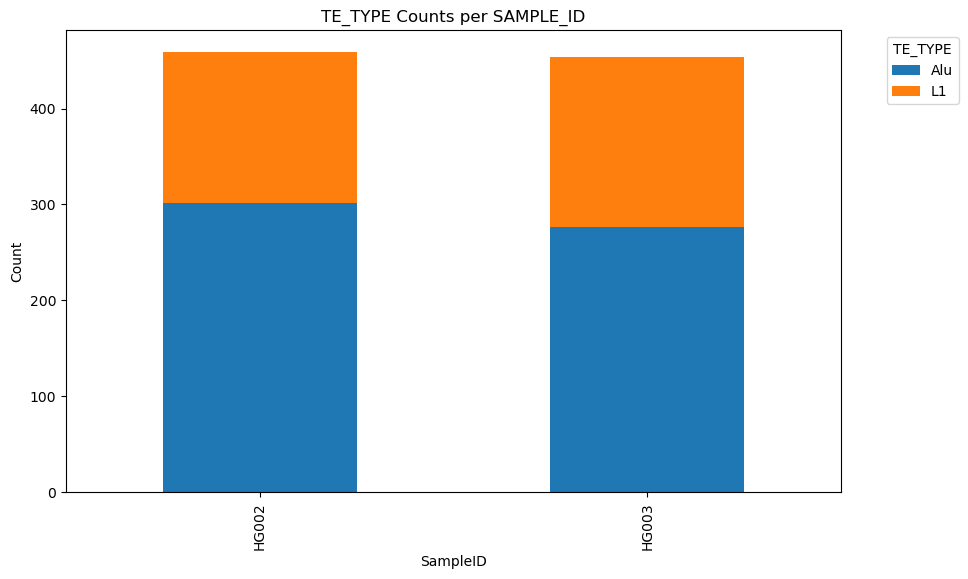

In [61]:
plot_te_type_counts(giab_mosaic)

In [75]:
giab_germline = read_vcf_files("results/xTea/shortread/germline/GIAB")

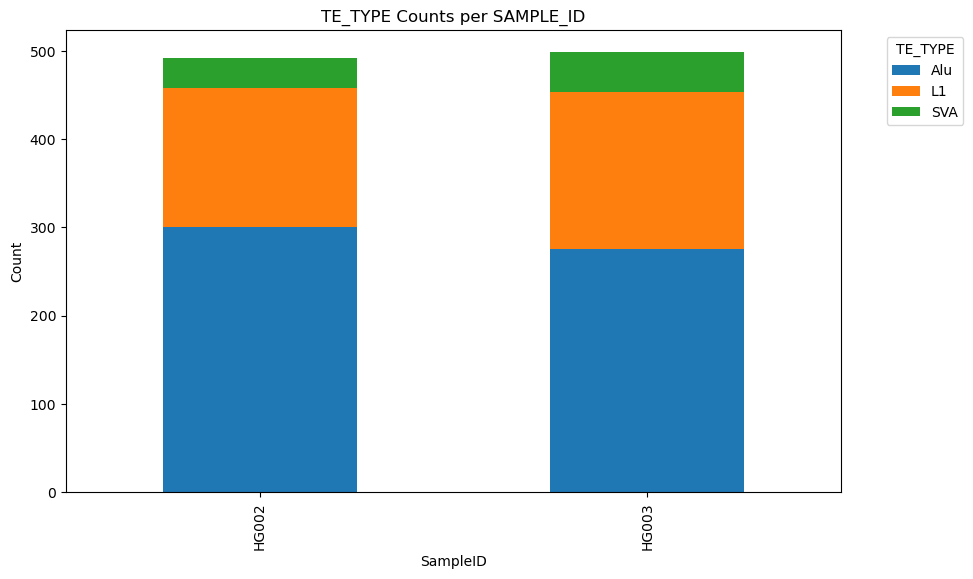

In [62]:
plot_te_type_counts(giab_germline)

In [78]:
final_result

,SAMPLE_GROUP,SAMPLE_ID,TE_TYPE,DuplicateCount,Somatic,Germline
0,Illumina300x,HG002,Alu,299,301,301
1,Illumina300x,HG002,L1,157,158,157
2,Illumina300x,HG003,Alu,275,276,275
3,Illumina300x,HG003,L1,178,178,179


In [80]:
non_duplicates_df1

,SAMPLE_GROUP,SAMPLE_ID,TE_TYPE,CHROM,POS,ID_x,REF_x,ALT_x,QUAL_x,FILTER_x,ID_y,REF_y,ALT_y,QUAL_y,FILTER_y
10,Illumina300x,HG002,Alu,chr1,85154441,None,T,[<INS:ME:ALU>],None,[],NaN,NaN,NaN,NaN,NaN
260,Illumina300x,HG002,Alu,chr17,80686361,None,T,[<INS:ME:ALU>],None,[],NaN,NaN,NaN,NaN,NaN
421,Illumina300x,HG002,L1,chr14,19667682,None,A,[<INS:ME:LINE1>],None,[],NaN,NaN,NaN,NaN,NaN
706,Illumina300x,HG003,Alu,chr19,14934351,None,G,[<INS:ME:ALU>],None,[],NaN,NaN,NaN,NaN,NaN


In [82]:
non_duplicates_df2

,SAMPLE_GROUP,SAMPLE_ID,TE_TYPE,CHROM,POS,ID_x,REF_x,ALT_x,QUAL_x,FILTER_x,ID_y,REF_y,ALT_y,QUAL_y,FILTER_y
913,Illumina300x,HG002,Alu,chr1,85154442,NaN,NaN,NaN,NaN,NaN,None,C,[<INS:ME:ALU>],None,[]
914,Illumina300x,HG002,Alu,chr17,80686360,NaN,NaN,NaN,NaN,NaN,None,A,[<INS:ME:ALU>],None,[]
915,Illumina300x,HG002,SVA,chr1,28189161,NaN,NaN,NaN,NaN,NaN,None,A,[<INS:ME:SVA>],None,[]
916,Illumina300x,HG002,SVA,chr1,38829924,NaN,NaN,NaN,NaN,NaN,None,A,[<INS:ME:SVA>],None,[]
917,Illumina300x,HG002,SVA,chr1,111353551,NaN,NaN,NaN,NaN,NaN,None,A,[<INS:ME:SVA>],None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Illumina300x,HG003,SVA,chr20,5287763,NaN,NaN,NaN,NaN,NaN,None,G,[<INS:ME:SVA>],None,[]
991,Illumina300x,HG003,SVA,chr20,10394171,NaN,NaN,NaN,NaN,NaN,None,T,[<INS:ME:SVA>],None,[]
992,Illumina300x,HG003,SVA,chr20,35152868,NaN,NaN,NaN,NaN,NaN,None,C,[<INS:ME:SVA>],None,[]
993,Illumina300x,HG003,SVA,chr22,16437275,NaN,NaN,NaN,NaN,NaN,None,A,[<INS:ME:SVA>],None,[]


In [77]:
(final_result, duplicates, non_duplicates_df1, non_duplicates_df2) = count_duplicate_insertions(giab_mosaic, giab_germline)

Duplicate Insertions and Counts:
   SAMPLE_GROUP SAMPLE_ID TE_TYPE  DuplicateCount  Somatic  Germline
0  Illumina300x     HG002     Alu             299      301       301
1  Illumina300x     HG002      L1             157      158       157
2  Illumina300x     HG003     Alu             275      276       275
3  Illumina300x     HG003      L1             178      178       179
Duplicated Insertions:
     SAMPLE_GROUP SAMPLE_ID TE_TYPE  CHROM        POS  ID_x REF_x  \
0    Illumina300x     HG002     Alu   chr1   21409317  None     T   
1    Illumina300x     HG002     Alu   chr1   28994950  None     C   
2    Illumina300x     HG002     Alu   chr1   29100313  None     A   
3    Illumina300x     HG002     Alu   chr1   37775710  None     C   
4    Illumina300x     HG002     Alu   chr1   37967093  None     A   
..            ...       ...     ...    ...        ...   ...   ...   
908  Illumina300x     HG003      L1  chr22   20075431  None     A   
909  Illumina300x     HG003      L1  chr22   23

### Compare Somatic and Germline of mixedDataRetroSom

In [52]:
simul_somatic = read_vcf_files("results/xTea/shortread/mosaic/mixedDataRetroSom")

In [53]:
simul_germline = read_vcf_files("results/xTea/shortread/germline/mixedDataRetroSom")

In [55]:
count_duplicate_insertions(simul_somatic, simul_germline)

Duplicate Insertions and Counts:
   SAMPLE_GROUP SAMPLE_ID TE_TYPE  DuplicateCount  Somatic  Germline
0          200x    CONT_1     Alu              87       97      1290
1          200x    CONT_1      L1              11       14       214
2          200x    CONT_2     Alu             107      128      1289
3          200x    CONT_2      L1               9       10       218
4          200x    CONT_3     Alu             115      125      1301
5          200x    CONT_3      L1              13       17       212
6          200x    CONT_4     Alu             119      141      1289
7          200x    CONT_4      L1              12       16       220
8          200x    CONT_5     Alu              88      101      1290
9          200x    CONT_5      L1              12       18       218
10         200x    CONT_6     Alu             112      132      1280
11         200x    CONT_6      L1              12       20       223
12         200x    TITR_1     Alu             285      486      1417
1